<a href="https://colab.research.google.com/github/jalindartalekar/Machine_Learning_Project/blob/main/Wine_dataset_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
wine_df = pd.read_csv('wine.csv')
print(wine_df)

wine_df.head()




      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
#Print the total number of rows and colums
wine_df.shape




(1143, 13)

In [8]:
wine_df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [11]:
wine_df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [12]:
wine_df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [13]:
wine_df['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


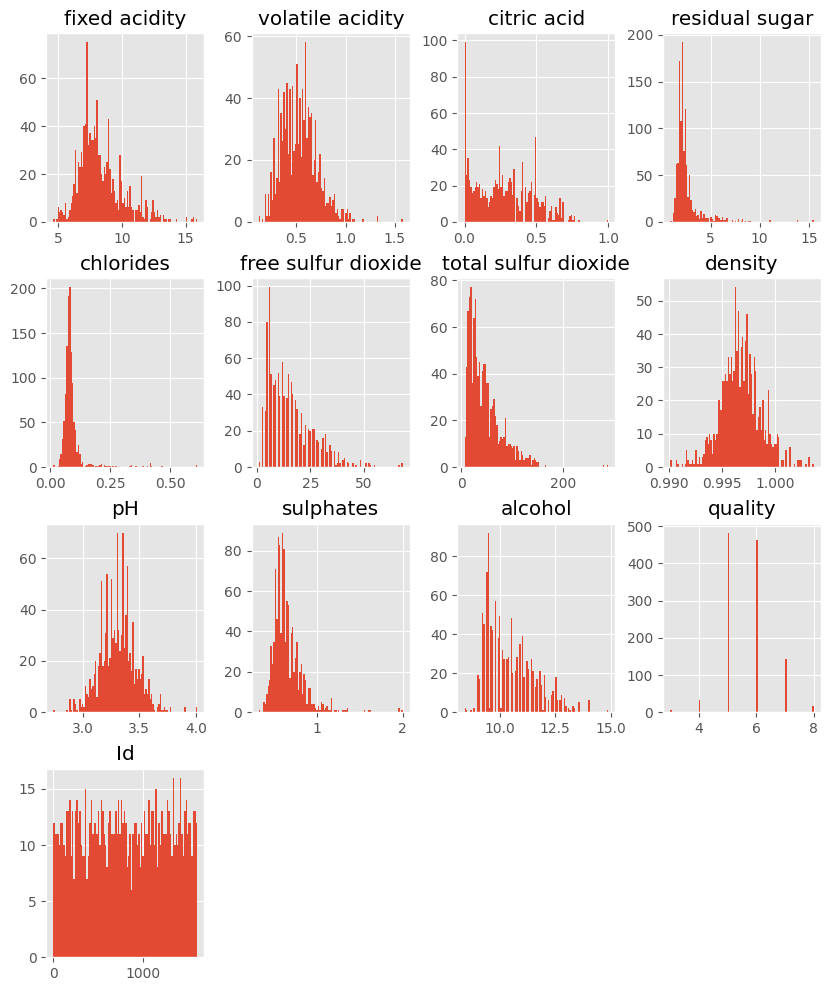

In [19]:
wine_df.hist(bins=100, figsize=(10,12))
plt.show()

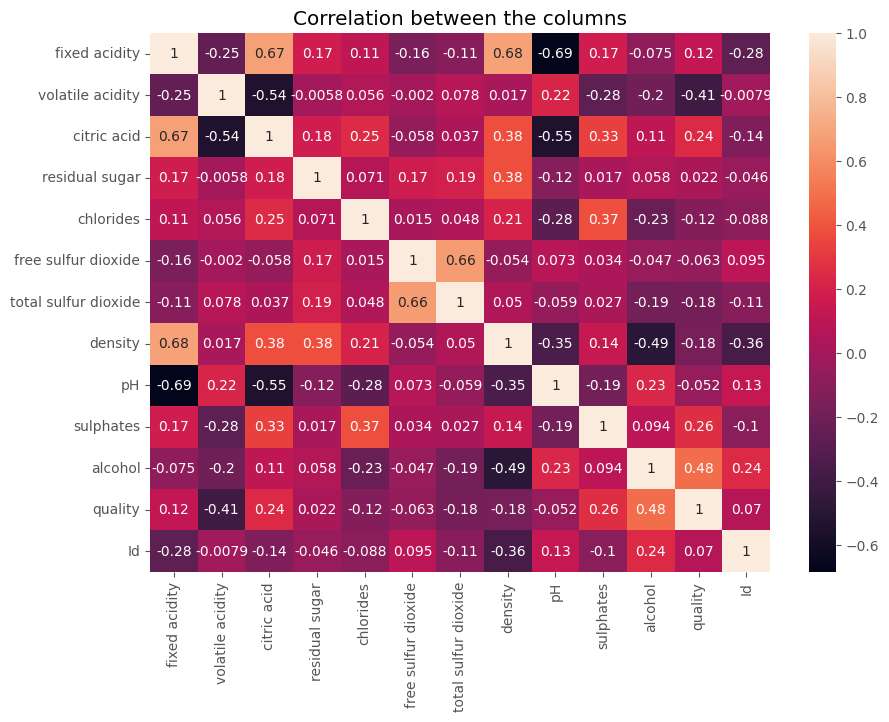

In [20]:
#print the correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [21]:
wine_df.corr()['quality'].sort_values()

,quality
volatile acidity,-0.407394
total sulfur dioxide,-0.183339
density,-0.175208
chlorides,-0.124085
free sulfur dioxide,-0.063260
pH,-0.052453
residual sugar,0.022002
Id,0.069708
fixed acidity,0.121970
citric acid,0.240821


In [25]:
#print the bar plot between quality and alcohol column

In [26]:
wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)

In [27]:

wine_df['quality'].value_counts()

,count
quality,
0,984
1,159


In [28]:

X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [30]:

print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (800, 12)
y_train  (800,)
X_test  (343, 12)
y_test  (343,)


In [31]:
#Logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuracy is: {:.2f}%".format(logreg_acc*100))

test accuracy is: 88.92%


In [32]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       298
           1       0.65      0.33      0.44        45

    accuracy                           0.89       343
   macro avg       0.78      0.65      0.69       343
weighted avg       0.87      0.89      0.87       343



TN:  290
FN:  30
TP:  15
FP:  8


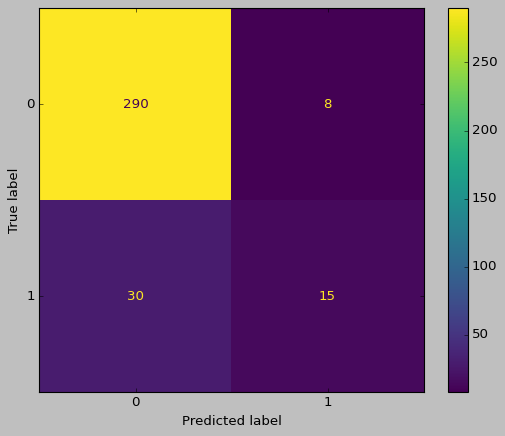

In [37]:
#print the confusion matrix
%matplotlib inline
from matplotlib import style
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [38]:
#Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 87.46%


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       298
           1       0.52      0.64      0.57        45

    accuracy                           0.87       343
   macro avg       0.73      0.78      0.75       343
weighted avg       0.89      0.87      0.88       343



TN:  271
FN:  16
TP:  29
FP:  27


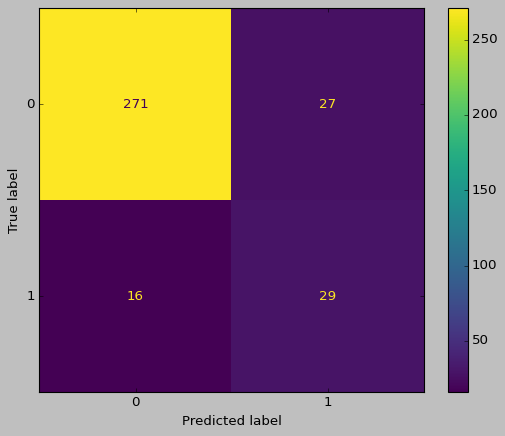

In [42]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

In [43]:
#Random Forest classifier Model
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 91.25%


In [44]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       298
           1       0.74      0.51      0.61        45

    accuracy                           0.91       343
   macro avg       0.84      0.74      0.78       343
weighted avg       0.90      0.91      0.91       343



TN:  290
FN:  22
TP:  23
FP:  8


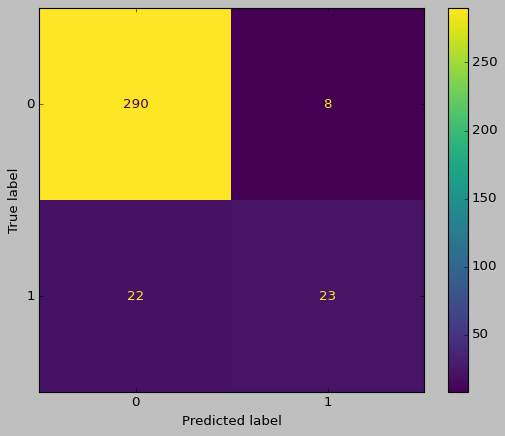

In [45]:

style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])